In [1]:
import pandas as pd 
import numpy as np
import time 
import matplotlib.pyplot as plt

In [2]:
df_accx = pd.read_csv("Downloads/Train_1/Acc_x_train_1.csv", header=None)
df_accy = pd.read_csv("Downloads/Train_1/Acc_y_train_1.csv", header=None)
df_accz = pd.read_csv("Downloads/Train_1/Acc_z_train_1.csv", header=None)
df_gyrx = pd.read_csv("Downloads/Train_1/Gyr_x_train_1.csv", header=None)
df_gyry = pd.read_csv("Downloads/Train_1/Gyr_y_train_1.csv", header=None)
df_gyrz = pd.read_csv("Downloads/Train_1/Gyr_z_train_1.csv", header=None)
labels = pd.read_csv("Downloads/Train_1/labels_train_1.csv", header=None)


In [3]:
df_accx

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-1.077889,-1.489613,-1.438783,-1.457909,-1.330404,-1.071001,-1.506137,-1.439139,-1.466377,-1.402347,...,-1.019677,-0.830715,-0.964348,-1.084696,-1.079483,-1.091208,-1.107158,-1.155510,-1.126861,-1.147167
1,-1.146887,-1.160566,-0.977457,-1.152031,-0.687245,-0.994804,-0.850746,-0.717160,-0.880832,-0.787904,...,-0.939794,-0.681841,-0.672202,-0.806475,-0.852091,-0.756208,-0.291576,-0.888031,-0.839020,-0.808839
2,-0.810237,-0.803906,-0.937367,-0.888830,-0.853493,-0.866375,-1.002508,-0.936785,-0.911975,-0.909091,...,-0.818108,-0.805620,-0.764217,-0.773826,-0.802690,-0.800057,-0.768268,-0.876734,-0.862862,-0.911913
3,-0.946278,-1.021568,-0.935827,-0.886008,-0.869594,-0.796406,-0.803121,-0.829610,-0.901657,-0.922945,...,-0.851171,-0.866475,-0.802323,-0.945886,-0.964929,-0.708072,0.112631,-0.709495,-0.772995,-0.725184
4,-0.706771,-0.779546,-0.476212,-1.128938,-0.949800,-0.929042,-0.820955,-0.839328,-0.895739,-0.896472,...,-0.795637,-1.018215,-0.829386,-0.813845,-0.801443,-0.793584,-0.779280,-0.842876,-0.847628,-0.830808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,0.860861,0.926646,0.975781,1.000463,1.051148,1.099773,1.175936,1.191113,1.205718,1.119732,...,2.284014,2.307471,2.287213,2.286704,2.289199,2.289342,2.188936,2.147420,1.230552,1.223370
5207,0.867162,0.848416,0.827833,1.225863,1.845406,0.813404,1.207018,1.587939,1.426683,1.349285,...,2.523618,2.521772,2.532428,2.526269,2.517060,2.530315,2.525429,2.520982,2.525858,2.530050
5208,2.522300,2.519794,2.535938,2.519522,2.519759,2.509214,2.453885,2.368801,2.295425,2.289396,...,-0.386323,0.382729,0.606361,0.699973,0.862712,1.504549,1.233929,1.075532,0.822507,0.852235
5209,0.982926,1.053619,0.964799,0.930685,1.123505,1.204031,1.053841,0.939975,0.678140,0.989545,...,0.923341,1.355667,1.886200,2.014653,1.942238,1.842240,1.638945,2.089226,2.309646,2.244656


In [4]:
df_accy

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-3.042689,-2.849762,-2.866504,-2.872480,-3.046087,-3.295942,-2.864503,-2.893296,-2.894975,-3.134266,...,-2.704412,-2.635339,-2.640936,-2.724451,-2.703472,-2.688893,-2.698414,-2.699739,-2.695133,-2.704061
1,-2.695182,-2.651077,-2.985256,-3.222526,-3.320487,-2.823430,-2.846682,-2.807795,-2.881476,-2.836180,...,-2.866929,-2.301257,-2.170395,-2.720272,-2.765513,-2.872680,-3.229364,-2.929117,-2.860563,-2.859279
2,-2.834726,-2.863199,-2.790414,-2.808154,-2.794856,-2.861103,-2.807620,-2.783585,-2.812906,-2.812025,...,-2.825314,-2.802556,-2.800139,-2.793177,-2.791322,-2.794531,-2.793143,-2.820481,-2.775676,-2.795703
3,-2.800317,-2.810161,-2.784158,-2.803023,-2.790962,-2.791311,-2.797083,-2.778757,-2.772317,-2.761608,...,-2.800582,-2.768778,-2.783484,-2.741648,-2.713543,-2.758237,-2.897527,-2.868514,-2.848029,-2.860777
4,-2.842639,-2.790093,-3.053917,-2.802748,-2.785534,-2.770120,-2.764651,-2.784589,-2.785037,-2.775467,...,-1.853554,-2.466216,-2.635126,-2.616996,-2.615423,-2.613730,-2.631933,-2.621362,-2.623340,-2.658344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,4.862856,4.833499,4.696054,4.699973,4.773330,4.871981,5.052301,5.097763,4.987653,4.674787,...,5.579494,5.560665,5.584919,5.583107,5.584323,5.584497,5.471871,5.560278,5.248540,5.000719
5207,4.630720,4.541933,4.567318,4.485494,4.316146,4.522055,4.448091,4.353471,4.344239,4.478281,...,5.791800,5.784812,5.804014,5.787878,5.777855,5.793157,5.792883,5.797428,5.779568,5.800372
5208,5.798681,5.794846,5.806818,5.789714,5.786691,5.788064,5.751043,5.748245,5.787670,5.784572,...,7.085399,7.077344,6.440780,6.671841,6.272612,6.007163,5.931284,6.163937,6.469229,6.155357
5209,5.667661,5.600800,6.017774,6.642832,7.030796,6.161934,5.740471,5.891777,6.592513,6.658021,...,6.851487,6.824311,6.354765,5.720958,6.028545,6.837676,6.792713,6.397983,5.309706,5.216553


In [5]:
df_accz

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,9.490958,9.489082,9.491423,9.487663,9.456602,9.411505,9.475417,9.483038,9.474904,9.405075,...,9.599186,9.602288,9.607411,9.580112,9.577246,9.580301,9.577217,9.572769,9.575804,9.573681
1,9.571114,9.572043,9.525989,9.419051,9.433341,9.547120,9.574582,9.579921,9.560588,9.562423,...,9.553980,9.720186,9.728905,9.603864,9.596016,9.564214,9.491248,9.527392,9.558546,9.564704
2,9.572229,9.568761,9.545953,9.555552,9.566551,9.559498,9.552162,9.564638,9.567211,9.571621,...,9.578268,9.578344,9.583025,9.585149,9.583757,9.584450,9.581141,9.574511,9.573921,9.569919
3,9.570084,9.565324,9.563295,9.567150,9.578377,9.585310,9.584341,9.575999,9.578835,9.575119,...,9.574114,9.579842,9.586607,9.590036,9.581470,9.608931,9.580922,9.568507,9.568925,9.568788
4,9.582303,9.571570,9.545086,9.543188,9.571831,9.580899,9.578811,9.577550,9.580148,9.578360,...,9.807005,9.639631,9.626777,9.625316,9.628973,9.632085,9.628795,9.623408,9.619031,9.608914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,-8.282891,-8.396229,-8.389902,-8.387600,-8.348845,-8.214774,-8.307327,-7.994429,-8.185388,-8.392555,...,-7.619747,-7.611326,-7.597790,-7.585320,-7.573957,-7.576759,-7.682734,-7.607888,-8.011768,-8.183101
5207,-8.463002,-8.499518,-8.480191,-8.488051,-8.543510,-8.499769,-8.509555,-8.531914,-8.560138,-8.486094,...,-7.336627,-7.342599,-7.330303,-7.314101,-7.321386,-7.317653,-7.339694,-7.317185,-7.308462,-7.315197
5208,-7.350423,-7.321355,-7.321763,-7.318170,-7.361923,-7.338268,-7.385548,-7.419393,-7.439770,-7.412185,...,-6.887199,-7.078360,-6.880469,-7.118758,-7.405318,-7.421931,-7.640936,-7.394678,-7.160276,-7.491745
5209,-7.901480,-7.932793,-7.578076,-7.004648,-6.543246,-7.326815,-7.732219,-7.524221,-7.246010,-6.912945,...,-6.849268,-6.759649,-6.972498,-7.540784,-7.222463,-6.579629,-6.726451,-6.960347,-7.762013,-7.953816


In [6]:
df_gyrx

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.044689,0.001804,0.005565,-0.003941,-0.043541,0.064023,0.004858,0.005201,-0.003196,-0.041717,...,0.011573,0.000616,0.008934,0.001367,0.004991,0.007416,0.004105,0.006542,0.007273,0.005284
1,0.005139,-0.004273,-0.039340,-0.011162,0.048962,0.020793,0.008060,0.004712,0.006332,0.008611,...,0.004502,0.118724,-0.091203,0.001498,0.010531,-0.037979,0.013496,0.024111,0.008673,0.008108
2,0.006405,0.010463,0.005308,0.006266,0.004361,0.006804,0.008792,0.004064,0.006642,0.007317,...,0.006895,0.007931,0.006392,0.005661,0.006388,0.006541,0.005314,0.005523,0.005919,0.004173
3,0.008588,0.006357,0.005966,0.006403,0.006500,0.006352,0.007036,0.005384,0.007965,0.004927,...,0.009388,0.006430,0.010726,0.008252,0.006655,-0.005366,0.007891,0.003889,-0.001131,0.016977
4,0.006262,-0.006209,0.013502,0.012851,0.009323,0.005414,0.003975,0.009056,0.005005,0.007410,...,-0.038316,-0.026126,0.010279,0.006539,0.006541,0.005743,0.004882,0.007165,0.004564,0.006396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,0.022355,0.019537,0.005410,0.013490,0.013013,0.010854,-0.041205,0.025523,0.015009,0.022133,...,0.008812,0.008957,0.008602,0.008387,0.008289,0.012234,0.020669,0.003951,0.052558,0.049275
5207,0.036337,0.008847,0.007272,0.010888,0.007617,0.009544,0.009872,0.007857,0.009494,-0.001251,...,0.009017,0.008902,0.008474,0.009110,0.008600,0.008544,0.008851,0.009113,0.008318,0.008513
5208,0.008990,0.008754,0.008586,0.008532,0.008769,0.010709,0.012108,0.007472,0.008090,0.008575,...,0.042900,0.037741,-0.011432,0.039146,0.029058,0.033196,-0.011753,-0.008387,-0.009671,0.067382
5209,0.039663,0.031141,-0.046802,-0.086588,0.033047,0.083629,0.022939,-0.044531,0.029352,0.017676,...,0.001145,-0.004002,0.107119,0.024311,-0.099928,0.044294,0.003770,0.111473,0.060230,-0.020810


In [7]:
df_gyrz

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.065891,0.001752,0.002214,0.008423,0.051032,-0.062646,0.000257,0.000201,-0.001175,0.027014,...,0.008101,-0.021275,0.003528,0.006000,0.003261,-0.001911,-0.003524,0.008354,-0.000773,-0.001758
1,0.002253,0.008036,0.057290,-0.008912,-0.048192,-0.038033,0.021406,-0.024272,-0.024175,-0.007555,...,-0.008158,-0.027742,0.015705,-0.004679,0.004252,-0.006638,0.017289,0.004216,0.001229,-0.007947
2,0.001315,-0.002543,-0.001650,-0.003087,-0.009248,0.011387,0.008010,-0.008171,-0.013746,0.005458,...,-0.000102,0.006148,-0.005675,0.001848,0.001094,0.000182,-0.014065,0.018043,0.007523,-0.020283
3,0.013672,0.013287,-0.013796,-0.018822,0.001776,0.001189,-0.002629,0.010648,0.010476,-0.010974,...,-0.009821,-0.007985,0.014600,0.010818,-0.025211,-0.041516,0.019873,0.004239,-0.016336,0.010107
4,-0.001110,-0.007453,0.010066,0.017854,0.002559,-0.004822,-0.014810,0.001499,0.008106,-0.000204,...,-0.010408,0.001223,0.003416,-0.000007,-0.001007,0.003715,-0.005493,0.003147,-0.008621,-0.003543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,0.001933,0.007153,0.002779,-0.002976,0.003578,0.023481,0.021469,0.032933,0.019978,0.000872,...,0.001449,0.001165,0.001226,0.001371,0.001345,0.000857,0.017097,-0.025348,-0.001766,0.001660
5207,-0.002408,0.002520,0.004120,0.007650,0.003421,-0.006914,-0.001677,-0.001791,-0.008862,0.002801,...,0.001494,0.001179,0.001552,0.001185,0.001493,0.001522,0.001290,0.001443,0.001110,0.001402
5208,0.001726,0.001094,0.001068,0.001380,0.001159,0.002748,0.003701,-0.003369,0.001452,0.000204,...,0.019313,0.027336,-0.005125,-0.002831,0.007357,0.010148,-0.025632,-0.019468,-0.003817,-0.031496
5209,-0.045646,-0.018215,-0.005154,0.000623,0.009414,-0.035906,-0.072077,-0.074924,-0.020582,0.011039,...,0.001390,0.001864,0.062114,0.020310,-0.067189,0.023217,0.012615,0.072693,0.071525,0.051334


In [8]:
labels

,0
0,1
1,1
2,1
3,1
4,1
...,...
5206,4
5207,4
5208,4
5209,4


In [9]:
labels.iloc[np.where(labels==4)[0]]

,0
163,4
164,4
165,4
166,4
167,4
...,...
5206,4
5207,4
5208,4
5209,4


In [10]:
ones = labels.iloc[np.where(labels==1)[0]]
twos = labels.iloc[np.where(labels==2)[0]]
threes = labels.iloc[np.where(labels==3)[0]]
fours = labels.iloc[np.where(labels==4)[0]]

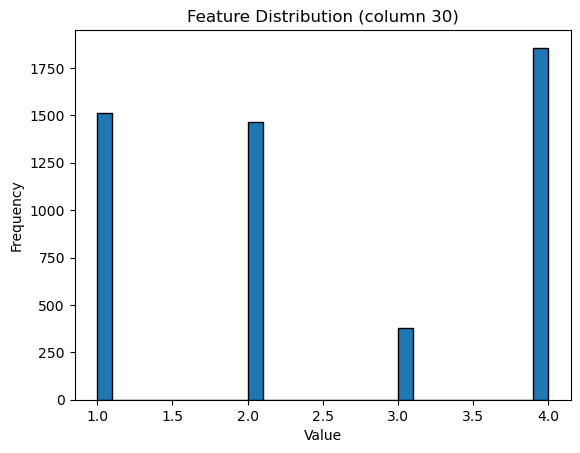

Percent of Data Labeled 1: 0.29034734216081365 
Percent of Data Labeled 2: 0.2807522548455191 
Percent of Data Labeled 3: 0.07253886010362694 
Percent of Data Labeled 4: 0.3563615428900403 
CPU times: total: 266 ms
Wall time: 327 ms


In [11]:
%%time
plt.hist(labels, bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(f"Percent of Data Labeled 1: {len(ones) / len(labels)} ")
print(f"Percent of Data Labeled 2: {len(twos) / len(labels)} ")
print(f"Percent of Data Labeled 3: {len(threes) / len(labels)} ")
print(f"Percent of Data Labeled 4: {len(fours) / len(labels)} ")


## Data Description

### 6 datasets 
#### - 3 axes of linear acceleration 
#### - 3 axes of rotational acceleration. 

### Human Activity Recognition (HAR)

#### Data is split into 1-minute time windows with no overlap. The i-th row represents the i-th minute time window. Each row has 60 values, corresponding to the sensor axis measurement at each second of the i-th minute. Finally, the label for the i-th time window is stored as the i-th entry of the labels file. 

#### Different row are sorted in increasing time order but they may not be consecutive minute after minute (normally, the next row would be a minute ahead of the previous row but that may not be the case here).

#### We briefly note that the second data columns are a poor choice of features for statistical models. Could use deep-learning to automatically learn the feature representation. 

#### Do not use K-Fold Cross Validation due to the data being time dependent. Can use Holdout cross validation w/o shuffling (hold out the last k% of data or the middle k% of data)

#### We also note that consecutive rows often denote consecutive time windows, meaning that the labels between those consecutive rows should not change too frequently. We could thus consider a smoothing of predictions.

### Accuracy Metric
#### Micro-averaged F1 score: Treats each example equally and favors more frequent classes (activities)

#### Macro-averaged F1 score: treats each class equally. 


### Notes from Hammerla-2016-Deep, convolutional, and recurre.pdf
CNN -> RNN instead of just RNNo n sequence of individual samples 
Max-in norm regularization: After each mini-batch the incoming weights of each unit in the network are scaled to have a maximum euclidean length of d_in

Mini-bathc with stratification (Can we train w stratification?)

A forward LSTM contextualises the current time-step based on those it has seen previously and is inherently suitable for real-time application where, at inference time, the "future" is not yet known. Bi-directional LSTMs on the other hand use both the future and past context to intepret the input at tiemstep t, which makes then suitable for offline analysis scenarios

For RNN: To prevent a large RNN from memorizing the entire input-output sequence and generalizing poorly, we can introduce "breaks" where the internal states of the RNN are reset to zero: After each mini-batch we decide to retain the internal state of the RNN with a carry-over probabilitty p_carry and reset it to zero otherwise.

After each epoch of training we evaluate the performance of the model on the validation set. Each model is trained for at least 30 epochs and for a maximum of 300 epochs. After 30 epochs, training stops if there is no increase in validation performance for 10 subsequent epochs. We select the epoch that showed the best validation-set performance and apply the corresponding model to the test-set.

fANOVA : Determines the extent to which each hyper-parameter cotributes to a network's performance. It builds a predictive model (random forest) of the model performance as a func- tion of the model’s hyper-parameters.This non-linear model is then decomposed into marginal and joint interaction func- tions of the hyper-parameters, from which the percentage contribution to overall variability of network performance is obtained.

For CNNs we recommend to start exploring learning-rates, before optimis- ing the architecture of the network, as the learning-parameters had the largest effect on performance in our experiments

However, we found that DNNs are very sensitive to their hyper-parameters and require a significant investment into parameter explo- ration.


### Two Approaches: 
#### 1) Feature Selection + Classifier 
#### 2) Neural Networks (DNNs, CNNs, RNNs)

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
from scipy.fftpack import fft
from scipy.signal import welch


In [13]:
def extract_time_features(x):
    features = {}
    features['mean'] = np.mean(x)
    features['std'] = np.std(x)
    features['var'] = np.var(x)
    features['median'] = np.median(x)
    features['min'] = np.min(x)
    features['max'] = np.max(x)
    features['range'] = np.max(x) - np.min(x)
    features['p10'] = np.percentile(x, 10)
    features['p25'] = np.percentile(x, 25)
    features['p75'] = np.percentile(x, 75)
    features['p90'] = np.percentile(x, 90)
    features['iqr'] = features['p75'] - features['p25']
    features['rms'] = np.sqrt(np.mean(x**2))
    
    # zero crossings
    features['zero_crossings'] = np.sum(np.diff(np.sign(x)) != 0)

    # peaks
    peaks, _ = find_peaks(x)
    features['num_peaks'] = len(peaks)

    # shape statistics
    features['skewness'] = skew(x)
    features['kurtosis'] = kurtosis(x)

    return features


In [14]:
def extract_freq_features(x, fs=1.0):
    # Compute FFT
    freqs = np.fft.rfftfreq(len(x), 1/fs)
    mag = np.abs(np.fft.rfft(x))

    features = {}
    features['spec_energy'] = np.sum(mag**2)
    features['dom_freq'] = freqs[np.argmax(mag)]
    features['mean_freq'] = np.sum(freqs * mag) / np.sum(mag)

    # spectral entropy
    p = mag / np.sum(mag)
    features['spec_entropy'] = -np.sum(p * np.log2(p + 1e-12))

    # spectral centroid
    features['spec_centroid'] = np.sum(freqs * mag) / np.sum(mag)

    # band powers (example)
    features['low_freq_energy'] = np.sum(mag[(freqs <= 0.1)])
    features['mid_freq_energy'] = np.sum(mag[(freqs > 0.1) & (freqs <= 0.3)])
    features['high_freq_energy'] = np.sum(mag[(freqs > 0.3)])

    return features


In [15]:
def extract_autocorr_features(x):
    corr = np.correlate(x - np.mean(x), x - np.mean(x), mode='full')
    corr = corr[len(corr)//2:]  # keep positive lags

    features = {
        'autocorr_lag1': corr[1] / corr[0],
        'autocorr_lag2': corr[2] / corr[0],
        'autocorr_max': np.max(corr[1:]) / corr[0]
    }
    return features


In [16]:
def extract_features_from_axis(x):
    f = {}
    f.update(extract_time_features(x))
    f.update(extract_freq_features(x))
    f.update(extract_autocorr_features(x))
    return f


In [17]:
def extract_features_from_dataset(data):
    rows = []
    for i in range(data.shape[0]):
        row_features = extract_features_from_axis(data.iloc[i])
        rows.append(row_features)
    return pd.DataFrame(rows)


In [18]:
%%time
features_df = extract_features_from_dataset(df_accx)
print(features_df.shape)


(5211, 28)
CPU times: total: 19 s
Wall time: 19.8 s


In [19]:
features_df

,mean,std,var,median,min,max,range,p10,p25,p75,...,dom_freq,mean_freq,spec_entropy,spec_centroid,low_freq_energy,mid_freq_energy,high_freq_energy,autocorr_lag1,autocorr_lag2,autocorr_max
0,-1.190703,0.347513,0.120765,-1.137014,-1.883107,0.073880,1.956987,-1.518844,-1.456492,-0.996147,...,0.0,0.075244,2.953078,0.075244,96.776904,20.351286,11.425189,0.746275,0.575587,0.746275
1,-0.802572,0.166017,0.027562,-0.821124,-1.160566,-0.291576,0.868990,-0.941571,-0.896220,-0.755923,...,0.0,0.087039,2.856027,0.087039,59.682984,11.792792,9.541081,0.361170,0.161548,0.361170
2,-0.782922,0.151545,0.022966,-0.803298,-1.002508,-0.089104,0.913404,-0.927304,-0.867109,-0.741392,...,0.0,0.077634,2.751381,0.077634,57.537837,11.479539,7.405578,0.532272,0.292779,0.532272
3,-0.844172,0.191887,0.036821,-0.875538,-1.061969,0.112631,1.174600,-0.989800,-0.949065,-0.796573,...,0.0,0.092494,3.046454,0.092494,62.094764,17.112121,10.828433,0.372950,0.052901,0.372950
4,-0.748877,0.238754,0.057004,-0.808516,-1.128938,0.088193,1.217131,-0.954825,-0.895922,-0.703322,...,0.0,0.106770,3.421837,0.106770,60.916198,20.515946,12.142907,0.433426,0.119399,0.433426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,1.664175,0.742419,0.551187,2.168178,-0.017777,2.514385,2.532162,0.667173,1.051990,2.333478,...,0.0,0.062169,2.869605,0.062169,155.762443,20.055291,14.295202,0.909414,0.823551,0.909414
5207,1.929627,0.822055,0.675774,2.521377,-0.493841,2.649703,3.143544,0.846358,1.277756,2.534336,...,0.0,0.070662,3.077855,0.070662,183.029265,31.521028,17.435307,0.885083,0.773435,0.885083
5208,1.410571,0.658274,0.433325,1.282742,-0.386323,2.535938,2.922261,0.735760,0.881660,2.015422,...,0.0,0.087053,3.376923,0.087053,132.930171,36.100510,18.808526,0.834505,0.685026,0.834505
5209,1.320829,0.481604,0.231942,1.419496,0.100870,2.403774,2.302904,0.772698,0.987890,1.461541,...,0.0,0.078816,3.123163,0.078816,118.065433,22.733905,15.164752,0.807172,0.649683,0.807172


In [20]:
all_axes = [df_accx,df_accy,df_accz,df_gyrx,df_gyry,df_gyrz]

In [21]:
%%time
feature_dfs = []
for axis_data in all_axes:   # list of 6 arrays, each shape (5211, 60)
    feature_dfs.append(extract_features_from_dataset(axis_data))

# concatenate side-by-side
final_features = pd.concat(feature_dfs, axis=1)
print(final_features.shape)


(5211, 168)
CPU times: total: 1min 34s
Wall time: 1min 35s


In [22]:
final_features["mean"]

,mean,mean,mean,mean,mean,mean
0,-1.190703,-2.842962,9.519042,0.006793,0.004836,-0.003501
1,-0.802572,-2.837896,9.566420,0.005907,0.003179,-0.002039
2,-0.782922,-2.822640,9.573140,0.006214,0.003801,-0.001010
3,-0.844172,-2.765951,9.582238,0.006207,0.003457,-0.000866
4,-0.748877,-2.654359,9.614670,0.006618,0.003826,-0.001786
...,...,...,...,...,...,...
5206,1.664175,5.631538,-7.630455,0.008872,0.003686,0.002382
5207,1.929627,5.485373,-7.656154,0.006474,0.008250,0.001778
5208,1.410571,5.456462,-7.703096,0.009686,0.013023,-0.017097
5209,1.320829,6.489419,-7.022358,0.010631,0.006043,0.001385


In [23]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neural_network import MLPClassifier
import joblib
import warnings

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

warnings.filterwarnings("ignore")

In [24]:
RANDOM_STATE = 42
VAL_FRAC = 0.20   # fraction of the data to hold out as validation (time-based, last VAL_FRAC)
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

# ====== Helper: time-aware train/val split ======
def time_holdout_split(X, y, val_frac=VAL_FRAC):
    """
    Hold out the last val_frac fraction of the samples as validation (no shuffling).
    Inputs:
      X: numpy array or DataFrame, shape (n_samples, n_features)
      y: array-like shape (n_samples,)
    Returns:
      X_train, X_val, y_train, y_val  (as np.arrays)
    """
    n = len(X)
    split = int(np.floor((1.0 - val_frac) * n))
    if isinstance(X, pd.DataFrame):
        X_train = X.iloc[:split].values
        X_val = X.iloc[split:].values
    else:
        X_train = X[:split]
        X_val = X[split:]
    y_train = np.asarray(y[:split])
    y_val = np.asarray(y[split:])
    return X_train, X_val, y_train, y_val

def scale_data(X_train, X_val):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    return X_train_scaled, X_val_scaled, scaler

def train_sklearn_model(clf, X_train, y_train, save_name=None):
    clf.fit(X_train, y_train)
    if save_name:
        joblib.dump(clf, os.path.join(MODEL_DIR, save_name))
    return clf

def evaluate_model(clf, X_val, y_val, model_name):
    y_pred = clf.predict(X_val)
    micro = f1_score(y_val, y_pred, average="micro")
    macro = f1_score(y_val, y_pred, average="macro")
    print(f"=== {model_name} ===")
    print(f"Micro F1: {micro:.4f} | Macro F1: {macro:.4f}")
    print(classification_report(y_val, y_pred, zero_division=0))
    return {"model": model_name, "micro_f1": micro, "macro_f1": macro}

class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims=[256, 128], n_classes=10, dropout=0.3):
        super().__init__()
        layers = []
        prev = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(prev, h))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            prev = h
        layers.append(nn.Linear(prev, n_classes))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

def train_torch_mlp(X_train, y_train, X_val, y_val, n_classes, device='cpu',
                    hidden_dims=[256,128], lr=1e-3, batch_size=64, epochs=40, save_name=None):
    X_train_t = torch.tensor(X_train, dtype=torch.float32)
    y_train_t = torch.tensor(y_train, dtype=torch.long)
    X_val_t = torch.tensor(X_val, dtype=torch.float32)
    y_val_t = torch.tensor(y_val, dtype=torch.long)

    train_ds = TensorDataset(X_train_t, y_train_t)
    val_ds = TensorDataset(X_val_t, y_val_t)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    model = SimpleMLP(input_dim=X_train.shape[1], hidden_dims=hidden_dims, n_classes=n_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_macro = -np.inf
    best_state = None
    for epoch in range(1, epochs+1):
        model.train()
        running_loss = 0.0
        for xb, yb in train_loader:
            xb = xb.to(device); yb = yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)
        avg_train_loss = running_loss / len(train_loader.dataset)

        model.eval()
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(device)
                out = model(xb)
                preds = out.argmax(dim=1).cpu().numpy()
                all_preds.append(preds)
                all_targets.append(yb.numpy())
        all_preds = np.concatenate(all_preds)
        all_targets = np.concatenate(all_targets)
        micro = f1_score(all_targets, all_preds, average='micro')
        macro = f1_score(all_targets, all_preds, average='macro')
        if macro > best_macro:
            best_macro = macro
            best_state = model.state_dict()
        if epoch % 10 == 0 or epoch == 1:
            print(f"[Epoch {epoch}/{epochs}] loss={avg_train_loss:.4f} microF1={micro:.4f} macroF1={macro:.4f}")

    if best_state is not None:
        model.load_state_dict(best_state)
    if save_name:
        torch.save(model.state_dict(), os.path.join(MODEL_DIR, save_name))
    return model, {"micro_f1": micro, "macro_f1": macro}

def run_all_models(X, y, val_frac=VAL_FRAC, random_state=RANDOM_STATE):
    X_train, X_val, y_train, y_val = time_holdout_split(X, y, val_frac=val_frac)
    print(f"Train samples: {len(X_train)} | Val samples: {len(X_val)}")

    X_train_s, X_val_s, scaler = scale_data(X_train, X_val)

    results = []

    lr = LogisticRegression(max_iter=2000, random_state=random_state, n_jobs=-1)
    train_sklearn_model(lr, X_train_s, y_train, save_name="logistic_regression.joblib")
    results.append(evaluate_model(lr, X_val_s, y_val, "LogisticRegression"))

    ridge = RidgeClassifier()
    train_sklearn_model(ridge, X_train_s, y_train, save_name="ridge_classifier.joblib")
    results.append(evaluate_model(ridge, X_val_s, y_val, "RidgeClassifier"))

    rf = RandomForestClassifier(n_estimators=200, random_state=random_state, n_jobs=-1)
    train_sklearn_model(rf, X_train_s, y_train, save_name="random_forest.joblib")
    results.append(evaluate_model(rf, X_val_s, y_val, "RandomForest"))

    mlp = MLPClassifier(hidden_layer_sizes=(256,128), max_iter=500, early_stopping=True, random_state=random_state)
    train_sklearn_model(mlp, X_train_s, y_train, save_name="sklearn_mlp.joblib")
    results.append(evaluate_model(mlp, X_val_s, y_val, "Sklearn-MLP"))

    xgb_clf = xgb.XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric="mlogloss", random_state=random_state)
    xgb_clf.fit(X_train_s, y_train)
    results.append(evaluate_model(xgb_clf, X_val_s, y_val, "XGBoost"))


    lgb_clf = lgb.LGBMClassifier(n_estimators=200, random_state=random_state, verbose=-1)
    lgb_clf.fit(X_train_s, y_train)
    results.append(evaluate_model(lgb_clf, X_val_s, y_val, "LightGBM"))


    cat_clf = CatBoostClassifier(verbose=0, random_state=random_state, iterations=500)
    cat_clf.fit(X_train_s, y_train)
    results.append(evaluate_model(cat_clf, X_val_s, y_val, "CatBoost"))


    n_classes = int(np.max(y) + 1)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Training PyTorch MLP on device:", device)
    pt_model, pt_scores = train_torch_mlp(X_train_s, y_train, X_val_s, y_val, n_classes=n_classes, device=device,
                                          hidden_dims=[256,128], lr=1e-3, batch_size=64, epochs=50, save_name="pt_mlp.pth")
    results.append({"model":"PyTorch-MLP", **pt_scores})

    results_df = pd.DataFrame(results).sort_values(by="macro_f1", ascending=False).reset_index(drop=True)
    return results_df



In [25]:
labels.shape

(5211, 1)

In [26]:
X = final_features
y = np.array(labels-1).reshape(-1)# [0,1,2,3] instead of [1,2,3,4]

In [27]:
X.shape,y.shape

((5211, 168), (5211,))

In [28]:
%%time
# ====== Example usage ======
# Expected: X: (n_samples, n_features), y: (n_samples,)

results = run_all_models(X, y, val_frac=0.20)
print("\nSummary (sorted by macro F1):")
print(results)

Train samples: 4168 | Val samples: 1043
=== LogisticRegression ===
Micro F1: 0.8245 | Macro F1: 0.8104
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       322
           1       0.93      0.81      0.87       113
           2       0.74      0.74      0.74        31
           3       0.89      0.80      0.85       577

    accuracy                           0.82      1043
   macro avg       0.82      0.81      0.81      1043
weighted avg       0.84      0.82      0.83      1043

=== RidgeClassifier ===
Micro F1: 0.8926 | Macro F1: 0.9117
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       322
           1       0.96      0.95      0.96       113
           2       0.91      0.97      0.94        31
           3       0.95      0.86      0.90       577

    accuracy                           0.89      1043
   macro avg       0.90      0.92      0.91      1043
weighted avg       0.9

  File "C:\Users\ekkoi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.

=== LightGBM ===
Micro F1: 0.8313 | Macro F1: 0.8828
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       322
           1       0.96      0.97      0.97       113
           2       0.91      1.00      0.95        31
           3       0.94      0.76      0.84       577

    accuracy                           0.83      1043
   macro avg       0.87      0.91      0.88      1043
weighted avg       0.86      0.83      0.83      1043

=== CatBoost ===
Micro F1: 0.8686 | Macro F1: 0.9077
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       322
           1       0.96      0.98      0.97       113
           2       0.94      1.00      0.97        31
           3       0.95      0.82      0.88       577

    accuracy                           0.87      1043
   macro avg       0.90      0.93      0.91      1043
weighted avg       0.88      0.87      0.87      1043

Training PyTorch MLP on 

### Deep Learning

In [29]:
import torch.nn.functional as F
import math
from torch.utils.data import Dataset, DataLoader

In [30]:
X = np.stack([
    df_accx,
    df_accy,
    df_accz,
    df_gyrx,
    df_gyry,
    df_gyrz, 
], axis=1)   # shape = (N, 6, 60)

y = np.array(labels-1).reshape(-1)


In [31]:
X.shape,y.shape

((5211, 6, 60), (5211,))

In [32]:
N = X.shape[0]
split = int(N * 0.8)

X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]


In [33]:
scaler = StandardScaler()

X_train_flat = X_train.reshape(-1, 6*60)
X_val_flat   = X_val.reshape(-1, 6*60)

scaler.fit(X_train_flat)

X_train = scaler.transform(X_train_flat).reshape(-1, 6, 60)
X_val   = scaler.transform(X_val_flat).reshape(-1, 6, 60)


In [34]:
X_train.shape,X_val.shape

((4168, 6, 60), (1043, 6, 60))

In [35]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
class HARdataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = HARdataset(X_train, y_train)
val_ds   = HARdataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=False)
val_loader   = DataLoader(val_ds, batch_size=256, shuffle=False)


In [37]:
class BaselineCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv1d(6, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm1d(32),

            nn.Conv1d(32, 64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm1d(64),

            nn.AdaptiveAvgPool1d(1)
        )

        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.conv(x)
        x = x.squeeze(-1)
        return self.fc(x)

class HAR_CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv1d(6, 64, kernel_size=7, padding=3),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(2),   # 60 -> 30

            nn.Conv1d(64, 128, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(2),   # 30 -> 15

            nn.Conv1d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.AdaptiveAvgPool1d(1)  # -> (batch, 256, 1)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.squeeze(-1)
        return self.classifier(x)

In [38]:
def train_model(model, train_loader, val_loader, epochs=30, lr=1e-3):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(1, epochs+1):
        model.train()
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)

            optimizer.zero_grad()
            logits = model(Xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()

        # Evaluate
        model.eval()
        preds, true = [], []
        with torch.no_grad():
            for Xb, yb in val_loader:
                Xb = Xb.to(device)
                out = model(Xb)
                pred = out.argmax(dim=1).cpu().numpy()
                preds.append(pred)
                true.append(yb.numpy())

        preds = np.concatenate(preds)
        true  = np.concatenate(true)

        micro_f1 = f1_score(true, preds, average='micro')
        macro_f1 = f1_score(true, preds, average='macro')

        print(f"Epoch {epoch:02d} | micro F1: {micro_f1:.4f}  macro F1: {macro_f1:.4f}")


In [39]:
%%time
num_classes = len(np.unique(y))
model = BaselineCNN(num_classes)
train_model(model, train_loader, val_loader, epochs=20, lr=1e-3)


Epoch 01 | micro F1: 0.5542  macro F1: 0.6337
Epoch 02 | micro F1: 0.6050  macro F1: 0.6970
Epoch 03 | micro F1: 0.6443  macro F1: 0.7263
Epoch 04 | micro F1: 0.6548  macro F1: 0.7379
Epoch 05 | micro F1: 0.6357  macro F1: 0.7278
Epoch 06 | micro F1: 0.5657  macro F1: 0.6889
Epoch 07 | micro F1: 0.5638  macro F1: 0.6897
Epoch 08 | micro F1: 0.5590  macro F1: 0.6914
Epoch 09 | micro F1: 0.5743  macro F1: 0.7015
Epoch 10 | micro F1: 0.5772  macro F1: 0.7036
Epoch 11 | micro F1: 0.5532  macro F1: 0.6829
Epoch 12 | micro F1: 0.5494  macro F1: 0.6811
Epoch 13 | micro F1: 0.5743  macro F1: 0.6925
Epoch 14 | micro F1: 0.5724  macro F1: 0.7025
Epoch 15 | micro F1: 0.5676  macro F1: 0.6891
Epoch 16 | micro F1: 0.5724  macro F1: 0.6854
Epoch 17 | micro F1: 0.5896  macro F1: 0.7006
Epoch 18 | micro F1: 0.6031  macro F1: 0.7077
Epoch 19 | micro F1: 0.6242  macro F1: 0.7192
Epoch 20 | micro F1: 0.6491  macro F1: 0.7341
CPU times: total: 8.28 s
Wall time: 9 s


In [40]:
%%time
model = HAR_CNN(num_classes)
train_model(model, train_loader, val_loader, epochs=25, lr=1e-3)


Epoch 01 | micro F1: 0.5216  macro F1: 0.4957
Epoch 02 | micro F1: 0.5599  macro F1: 0.5959
Epoch 03 | micro F1: 0.5580  macro F1: 0.5924
Epoch 04 | micro F1: 0.5753  macro F1: 0.6200
Epoch 05 | micro F1: 0.5877  macro F1: 0.6128
Epoch 06 | micro F1: 0.5772  macro F1: 0.6378
Epoch 07 | micro F1: 0.5475  macro F1: 0.6146
Epoch 08 | micro F1: 0.5379  macro F1: 0.6509
Epoch 09 | micro F1: 0.4938  macro F1: 0.5946
Epoch 10 | micro F1: 0.4094  macro F1: 0.4824
Epoch 11 | micro F1: 0.5101  macro F1: 0.6314
Epoch 12 | micro F1: 0.4765  macro F1: 0.5915
Epoch 13 | micro F1: 0.4803  macro F1: 0.6392
Epoch 14 | micro F1: 0.4334  macro F1: 0.4267
Epoch 15 | micro F1: 0.4458  macro F1: 0.4721
Epoch 16 | micro F1: 0.5935  macro F1: 0.5079
Epoch 17 | micro F1: 0.4640  macro F1: 0.5282
Epoch 18 | micro F1: 0.4640  macro F1: 0.5747
Epoch 19 | micro F1: 0.4257  macro F1: 0.5232
Epoch 20 | micro F1: 0.4660  macro F1: 0.5066
Epoch 21 | micro F1: 0.5590  macro F1: 0.6514
Epoch 22 | micro F1: 0.4564  macro

In [41]:
class LSTMModel(nn.Module):
    def __init__(self, num_classes, input_channels=6, hidden_size=128, num_layers=2, bidirectional=True, dropout=0.3):
        super().__init__()
        self.input_channels = input_channels
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.n_directions = 2 if bidirectional else 1

        # We'll treat each time-step feature vector as size = input_channels
        self.rnn = nn.LSTM(input_size=input_channels,
                           hidden_size=hidden_size,
                           num_layers=num_layers,
                           batch_first=True,
                           bidirectional=bidirectional,
                           dropout=dropout if num_layers > 1 else 0.0)

        self.fc = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(hidden_size * self.n_directions, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # x: (batch, channels, seq_len) => convert to (batch, seq_len, channels)
        x = x.permute(0, 2, 1).contiguous()
        # RNN returns output: (batch, seq_len, hidden * num_directions)
        out, (hn, cn) = self.rnn(x)  
        # Use mean-pooling over time for robustness
        pooled = out.mean(dim=1)  # (batch, hidden * num_directions)
        return self.fc(pooled)


In [42]:
class GRUModel(nn.Module):
    def __init__(self, num_classes, input_channels=6, hidden_size=128, num_layers=2, bidirectional=True, dropout=0.3):
        super().__init__()
        self.input_channels = input_channels
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.n_directions = 2 if bidirectional else 1

        self.rnn = nn.GRU(input_size=input_channels,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True,
                          bidirectional=bidirectional,
                          dropout=dropout if num_layers > 1 else 0.0)

        self.fc = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(hidden_size * self.n_directions, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # x: (batch, channels, seq_len) -> (batch, seq_len, channels)
        x = x.permute(0, 2, 1).contiguous()
        out, hn = self.rnn(x)
        pooled = out.mean(dim=1)
        return self.fc(pooled)

In [43]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        # Create constant 'pe' matrix with values dependant on pos and i
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: (batch, seq_len, d_model) -> add pe[:, :seq_len, :]
        x = x + self.pe[:, :x.size(1), :]
        return x

In [44]:
class TransformerModel(nn.Module):
    def __init__(self, num_classes, input_channels=6, d_model=128, nhead=4, num_layers=3, dim_feedforward=256, dropout=0.2, max_len=60):
        """
        - input_channels: number of sensor axes (6)
        - d_model: embedding size for each time-step
        - nhead: attention heads
        """
        super().__init__()
        self.input_channels = input_channels
        self.d_model = d_model

        # project input channels -> d_model per time-step
        self.input_proj = nn.Linear(input_channels, d_model)

        # positional encoding and transformer encoder
        self.pos_enc = PositionalEncoding(d_model, max_len=max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model,
                                                   nhead=nhead,
                                                   dim_feedforward=dim_feedforward,
                                                   dropout=dropout,
                                                   batch_first=True)  # batch_first=True for (batch, seq, d_model)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # classifier head
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool1d(1),  # we'll transpose to (batch, d_model, seq) before pooling
            nn.Flatten(),
            nn.Dropout(0.3),
            nn.Linear(d_model, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # x: (batch, channels, seq_len) -> (batch, seq_len, channels)
        x = x.permute(0, 2, 1).contiguous()
        # project per time-step
        x = self.input_proj(x)  # (batch, seq_len, d_model)
        x = self.pos_enc(x)
        # transformer encoder
        x = self.transformer(x)  # (batch, seq_len, d_model)
        # classifier expects (batch, d_model, seq_len)
        x = x.permute(0, 2, 1).contiguous()
        return self.classifier(x)


In [45]:
# assume train_loader, val_loader already exist (from earlier)
num_classes = len(np.unique(y))  # your label count
num_classes

4

In [46]:
%%time
lstm = LSTMModel(num_classes=num_classes)
train_model(lstm, train_loader, val_loader, epochs=30, lr=1e-3)

Epoch 01 | micro F1: 0.6213  macro F1: 0.3485
Epoch 02 | micro F1: 0.6203  macro F1: 0.4294
Epoch 03 | micro F1: 0.6366  macro F1: 0.4756
Epoch 04 | micro F1: 0.5599  macro F1: 0.4638
Epoch 05 | micro F1: 0.6328  macro F1: 0.6526
Epoch 06 | micro F1: 0.6107  macro F1: 0.5625
Epoch 07 | micro F1: 0.7402  macro F1: 0.7665
Epoch 08 | micro F1: 0.7057  macro F1: 0.7145
Epoch 09 | micro F1: 0.6644  macro F1: 0.6914
Epoch 10 | micro F1: 0.7402  macro F1: 0.7215
Epoch 11 | micro F1: 0.7220  macro F1: 0.6931
Epoch 12 | micro F1: 0.7651  macro F1: 0.7735
Epoch 13 | micro F1: 0.7574  macro F1: 0.7638
Epoch 14 | micro F1: 0.7756  macro F1: 0.7561
Epoch 15 | micro F1: 0.7546  macro F1: 0.7526
Epoch 16 | micro F1: 0.7574  macro F1: 0.7623
Epoch 17 | micro F1: 0.7689  macro F1: 0.7605
Epoch 18 | micro F1: 0.7747  macro F1: 0.7873
Epoch 19 | micro F1: 0.7421  macro F1: 0.7624
Epoch 20 | micro F1: 0.7047  macro F1: 0.6996
Epoch 21 | micro F1: 0.6769  macro F1: 0.7091
Epoch 22 | micro F1: 0.6817  macro

In [47]:
%%time
gru = GRUModel(num_classes=num_classes)
train_model(gru, train_loader, val_loader, epochs=30, lr=1e-3)

Epoch 01 | micro F1: 0.6616  macro F1: 0.3951
Epoch 02 | micro F1: 0.6884  macro F1: 0.4864
Epoch 03 | micro F1: 0.7124  macro F1: 0.7062
Epoch 04 | micro F1: 0.6395  macro F1: 0.6674
Epoch 05 | micro F1: 0.6012  macro F1: 0.6093
Epoch 06 | micro F1: 0.6261  macro F1: 0.5829
Epoch 07 | micro F1: 0.7325  macro F1: 0.7400
Epoch 08 | micro F1: 0.6740  macro F1: 0.6789
Epoch 09 | micro F1: 0.7584  macro F1: 0.7636
Epoch 10 | micro F1: 0.7363  macro F1: 0.7433
Epoch 11 | micro F1: 0.7555  macro F1: 0.7454
Epoch 12 | micro F1: 0.7325  macro F1: 0.6987
Epoch 13 | micro F1: 0.7315  macro F1: 0.7587
Epoch 14 | micro F1: 0.6625  macro F1: 0.7080
Epoch 15 | micro F1: 0.7172  macro F1: 0.7215
Epoch 16 | micro F1: 0.7469  macro F1: 0.7635
Epoch 17 | micro F1: 0.7402  macro F1: 0.7564
Epoch 18 | micro F1: 0.7526  macro F1: 0.7820
Epoch 19 | micro F1: 0.6318  macro F1: 0.7311
Epoch 20 | micro F1: 0.6750  macro F1: 0.7422
Epoch 21 | micro F1: 0.7220  macro F1: 0.7750
Epoch 22 | micro F1: 0.6702  macro

In [48]:
%%time
transformer = TransformerModel(num_classes=num_classes, d_model=128, nhead=4, num_layers=3)
train_model(transformer, train_loader, val_loader, epochs=30, lr=3e-4)

Epoch 01 | micro F1: 0.6807  macro F1: 0.4832
Epoch 02 | micro F1: 0.6472  macro F1: 0.4936
Epoch 03 | micro F1: 0.7200  macro F1: 0.7679
Epoch 04 | micro F1: 0.7076  macro F1: 0.7218
Epoch 05 | micro F1: 0.7239  macro F1: 0.7562
Epoch 06 | micro F1: 0.6232  macro F1: 0.6376
Epoch 07 | micro F1: 0.6213  macro F1: 0.6400
Epoch 08 | micro F1: 0.6136  macro F1: 0.6376
Epoch 09 | micro F1: 0.7037  macro F1: 0.7345
Epoch 10 | micro F1: 0.7133  macro F1: 0.6938
Epoch 11 | micro F1: 0.7220  macro F1: 0.7824
Epoch 12 | micro F1: 0.7718  macro F1: 0.8187
Epoch 13 | micro F1: 0.7267  macro F1: 0.7621
Epoch 14 | micro F1: 0.7450  macro F1: 0.7744
Epoch 15 | micro F1: 0.7133  macro F1: 0.7229
Epoch 16 | micro F1: 0.7258  macro F1: 0.7433
Epoch 17 | micro F1: 0.6942  macro F1: 0.7571
Epoch 18 | micro F1: 0.6433  macro F1: 0.7319
Epoch 19 | micro F1: 0.6529  macro F1: 0.7132
Epoch 20 | micro F1: 0.6155  macro F1: 0.6304
Epoch 21 | micro F1: 0.6261  macro F1: 0.6768
Epoch 22 | micro F1: 0.6165  macro

In [49]:
BASE_PATH = "Downloads/Train_1/"

Micro-averaged F1 score: 0.7939964685108888
Macro-averaged F1 score: 0.7709647119816684


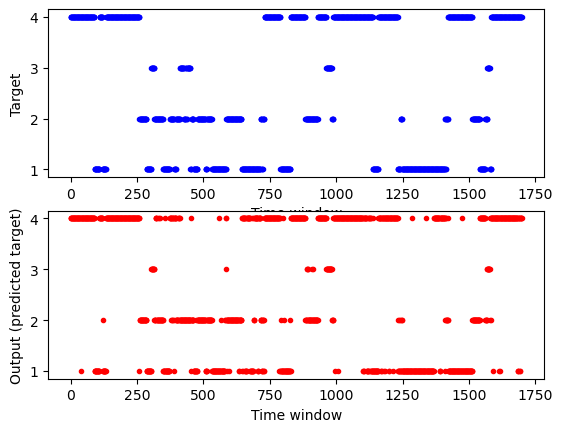

In [50]:
# -*- coding: utf-8 -*-
"""
Demo of logistic regression on mean and standard deviation of each sensor
for activity recognition data
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
sensor_names = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyr_x', 'Gyr_y', 'Gyr_z']
# Last row of training data for train/test split
train_end_index = 3511
# Logistic regression hyperparameters
C = 1
l1_ratio = 0.9
max_iter = int(1e4)
def predict_test(train_data, train_labels, test_data):
    # Feature extraction: compute mean and standard deviation of each row for
    # each sensor and concatenate across sensors to form the feature vector
    mean_train_feature = np.mean(train_data, axis=1)
    std_train_feature = np.std(train_data, axis=1)
    train_features = np.hstack((mean_train_feature, std_train_feature))
    mean_test_feature = np.mean(test_data, axis=1)
    std_test_feature = np.std(test_data, axis=1)
    test_features = np.hstack((mean_test_feature, std_test_feature))
    # Standardize features and train a logistic regression model
    scaler = StandardScaler()
    train_features_std = scaler.fit_transform(train_features)
    test_features_std = scaler.transform(test_features)
    lr = LogisticRegression(penalty='elasticnet', solver='saga',
    max_iter=max_iter, C=C, l1_ratio=l1_ratio)
    lr.fit(train_features_std, train_labels)
    test_outputs = lr.predict(test_features_std)
    return test_outputs
# Run this code only if being used as a script, not being imported
if __name__ == "__main__":
    # Load labels and training sensor data into 3-D array
    labels = np.loadtxt('Downloads/Train_1/labels_train_1.csv', dtype='int')
    data_slice_0 = np.loadtxt(BASE_PATH+sensor_names[0] + '_train_1.csv',
    delimiter=',')
    data = np.empty((data_slice_0.shape[0], data_slice_0.shape[1],
    len(sensor_names)))
    data[:, :, 0] = data_slice_0
    del data_slice_0
    for sensor_index in range(1, len(sensor_names)):
        data[:, :, sensor_index] = np.loadtxt(BASE_PATH+
        sensor_names[sensor_index] + '_train_1.csv', delimiter=',')
    # Split into training and test by row index. Do not use a random split as
    # rows are not independent!
    train_data = data[:train_end_index+1, :, :]
    train_labels = labels[:train_end_index+1]
    test_data = data[train_end_index+1:, :, :]
    test_labels = labels[train_end_index+1:]
    test_outputs = predict_test(train_data, train_labels, test_data)
    # Compute micro and macro-averaged F1 scores
    micro_f1 = f1_score(test_labels, test_outputs, average='micro')
    macro_f1 = f1_score(test_labels, test_outputs, average='macro')
    print(f'Micro-averaged F1 score: {micro_f1}')
    print(f'Macro-averaged F1 score: {macro_f1}')
    # Examine outputs compared to labels
    n_test = test_labels.size
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(n_test), test_labels, 'b.')
    plt.xlabel('Time window')
    plt.ylabel('Target')
    plt.subplot(2, 1, 2)
    plt.plot(np.arange(n_test), test_outputs, 'r.')
    plt.xlabel('Time window')
    plt.ylabel('Output (predicted target)')
    plt.show()